In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [33]:
# Importing data files

data_df = pd.read_csv("Resources/pollution_2006_2010.csv")
#merged_data_df = pd.read_csv("Resources/merged_output.csv")
#merged_data_df.head()
data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


In [34]:
# Removing decimal and zero from 'Year' column
data_df['Year'] = data_df['Year'].astype(str).replace('\.0', '', regex=True)
data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


#### Generate a summary statistics table of mean, median, variance, and
#### standard deviation for each pollutants verses county

#### Calculations for NO2 AQI:

In [35]:
# Group by County and aggregate mean, median, variance, standard deviation, and SEM of the NO2 AQI (Nitrogen dioxide Air Quality Index) for each County.
stat_no2_df = data_df.groupby(['County', 'Year']).agg({'NO2 AQI': [np.max, np.min, np.mean, np.median, np.var, np.std]})
stat_no2_df.head()

NO2 AQI                                            
                     amax amin       mean median        var       std
County       Year                                                    
Alameda      2007      44   22  30.958333   30.0  37.008772  6.083484
             2008      52    5  23.704420   25.0  90.248439  9.499918
             2009      47    4  21.945205   22.0  93.524069  9.670784
             2010      50    6  22.203655   22.0  77.685473  8.813936
Contra Costa 2006      52    3  19.006164   18.0  85.268672  9.234104

In [41]:
# Rename columns for mean, median, variance, standard deviation of the NO2 AQI (Nitrogen dioxide Air Quality Index) for each County.

stat_no2_df.columns = ['Max_Value', 'Min_Value', 'Mean', 'Median', 'Variance', 'Standard_Deviation']
stat_no2_df.head()

Max_Value  Min_Value       Mean  Median   Variance  \
County       Year                                                       
Alameda      2007         44         22  30.958333    30.0  37.008772   
             2008         52          5  23.704420    25.0  90.248439   
             2009         47          4  21.945205    22.0  93.524069   
             2010         50          6  22.203655    22.0  77.685473   
Contra Costa 2006         52          3  19.006164    18.0  85.268672   

                   Standard_Deviation  
County       Year                      
Alameda      2007            6.083484  
             2008            9.499918  
             2009            9.670784  
             2010            8.813936  
Contra Costa 2006            9.234104

In [42]:
# Resetting the Index

no2_df = stat_no2_df.reset_index()
no2_df.head()

,County,Year,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation
0,Alameda,2007,44,22,30.958333,30.0,37.008772,6.083484
1,Alameda,2008,52,5,23.704420,25.0,90.248439,9.499918
2,Alameda,2009,47,4,21.945205,22.0,93.524069,9.670784
3,Alameda,2010,50,6,22.203655,22.0,77.685473,8.813936
4,Contra Costa,2006,52,3,19.006164,18.0,85.268672,9.234104


In [43]:
grouped_df = no2_df.groupby("County")
max_no2_aqi = grouped_df.max()
max_no2_aqi = max_no2_aqi.reset_index()
max_no2_aqi.head()

,County,Year,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation
0,Alameda,2010,52,22,30.958333,30.0,93.524069,9.670784
1,Contra Costa,2010,65,3,19.006164,18.0,93.257324,9.656983
2,Fresno,2010,76,8,28.023622,27.0,155.974524,12.488976
3,Humboldt,2010,41,0,13.569231,14.0,59.499038,7.713562
4,Imperial,2010,110,4,33.295265,34.0,294.991038,17.175303


In [45]:
# Combining two columns
max_no2_aqi["County_Year"] = max_no2_aqi["County"] + "-" + max_no2_aqi["Year"]
max_no2_aqi.head()

,County,Year,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation,County_Year
0,Alameda,2010,52,22,30.958333,30.0,93.524069,9.670784,Alameda-2010
1,Contra Costa,2010,65,3,19.006164,18.0,93.257324,9.656983,Contra Costa-2010
2,Fresno,2010,76,8,28.023622,27.0,155.974524,12.488976,Fresno-2010
3,Humboldt,2010,41,0,13.569231,14.0,59.499038,7.713562,Humboldt-2010
4,Imperial,2010,110,4,33.295265,34.0,294.991038,17.175303,Imperial-2010


#### Visual Representation:

In [46]:
# Converting into list for plotting

county = list(max_no2_aqi['County_Year'])
no2_aqi = list(max_no2_aqi['Mean'])


#### Creating scatter plot for Counties Vs. Average Nitrogen_dioxide Air Quality Index

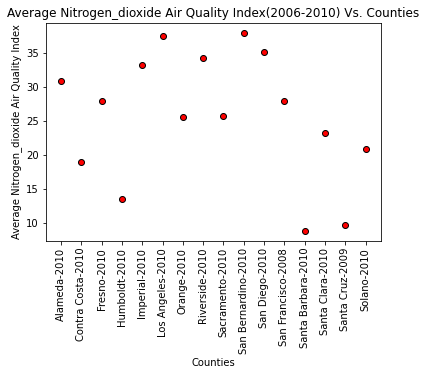

<Figure size 720x2880 with 0 Axes>

In [47]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Creating plots for Counties Vs. Average Nitrogen_dioxide Air Quality Index

plt.scatter(county, no2_aqi, marker="o", facecolors="red", edgecolors="black")


# Create a title, x label, and y label for our chart
plt.title("Average Nitrogen_dioxide Air Quality Index(2006-2010) Vs. Counties")
plt.xlabel("Counties")
plt.ylabel("Average Nitrogen_dioxide Air Quality Index")

# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.

labels = county
plt.xticks(county, labels, rotation='vertical', fontsize=10)


plt.figure(figsize=(10,40))

plt.savefig('mq_charts/county_avg_no2.png', dpi=300, bbox_inches='tight')

#plt.tight_layout()
plt.show()




#### EPA also retained the annual average NO2 standard of 53 ppb


#### Average Nitrogen-dioxide Air Quality Index(2006-2010) Vs. Counties is calculated and and found that 'Los Angeles' county and 'San Bernardino' has the maximum 'Average  nitrogen-dioxide Air Quality Index' from (2006-2010) of 37.562807 ppb and 37.983516 ppb